# Support vector machine

Its a classification technique
Widest margin that separates the two groups
The dostamce between the support vectors and the hyperplane are as far as possible

In [6]:
# import libraries

# libraries for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# libraries for vaisuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale = 1.2)

# Allows charts to appear in the notebook
%matplotlib inline

In [24]:
# Import Data
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv('muffcake.csv')
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


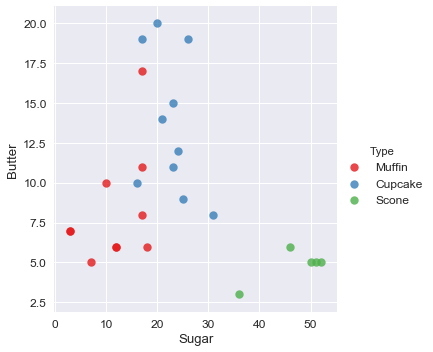

In [8]:
# Prepare the Data
# Plot two ingredients
sns.lmplot('Sugar', 'Butter', data = recipes, hue ='Type', palette = 'Set1',
          fit_reg = False, scatter_kws={"s": 70})

In [25]:
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


In [26]:
recipes.iloc[20:25, :]

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
20,Scone,29,3,46,6,0,11,0,6
21,Scone,19,3,36,3,14,7,14,5
22,Scone,20,5,52,5,10,3,0,5
23,Scone,19,6,50,5,6,10,0,3
24,Scone,19,10,51,5,0,10,0,5


In [27]:
recipes = recipes.iloc[: -5, ]

In [28]:
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


In [29]:
recipes = recipes.drop([3,11], axis =0)

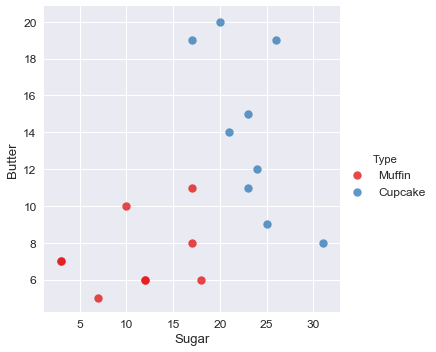

In [30]:
sns.lmplot('Sugar', 'Butter', data = recipes, hue ='Type', palette = 'Set1',
          fit_reg = False, scatter_kws={"s": 70})

In [31]:
#Fit the Model

# Specify inputs for the model
sugar_butter = recipes[['Sugar', 'Butter']].as_matrix()
type_label = np.where(recipes['Type'] == 'Muffin', 0, 1)

In [32]:
# Fit the SVM model
model = svm.SVC(kernel = 'linear')
model.fit(sugar_butter, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
# Visualize Results

#Get the separation hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5, 30)
yy = a * xx - (model.intercept_[0] / w[1])

# Plot the parallels to the separating hyperplane
# that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx +(b[1] - a * b[0])

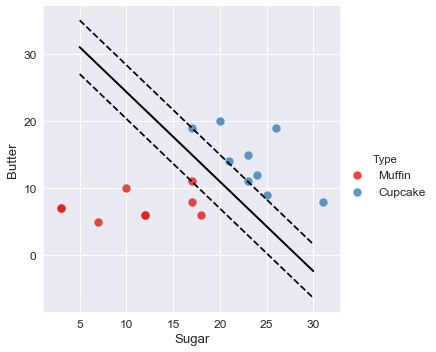

In [39]:
# Look at the margins and support vecotrs
sns.lmplot('Sugar', 'Butter', data=recipes, hue = 'Type', 
           palette='Set1', fit_reg=False, scatter_kws={'s': 70})
plt.plot(xx, yy, linewidth = 2, color = 'black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
           s=80, facecolors= 'none')

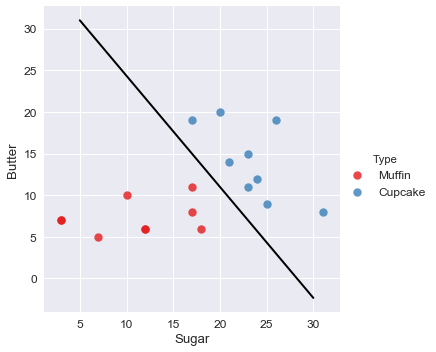

In [40]:
# Plot the hyperplane
sns.lmplot('Sugar', 'Butter', data=recipes, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws = {'s': 70})
plt.plot(xx, yy, linewidth = 2, color = 'black')

In [42]:
# Predict New Case

# Create a function to guess when a recipe is a muffin
# or a cupcake using the SVM model we created
def muffin_or_cupcake(butter, sugar):
    if(model.predict([[butter, sugar]])) == 0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [43]:
muffin_or_cupcake(12, 12)

You're looking at a muffin recipe!


In [46]:
muffin_or_cupcake(10,25)

You're looking at a cupcake recipe!


#### Pro and Cons of SVM

Pros<br>
-good at dealing with high dimensional data<br>
-works well on small data sets<br>
Cons<br>
-picking the right kernel and parameters can be computationally intensive